In [0]:
from __future__ import print_function
!pip install numpy==1.16.1
import numpy as np

import nltk
nltk.download('punkt')

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import GRU
from keras.datasets import imdb

import matplotlib.pyplot as plt


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Using TensorFlow backend.


In [0]:
max_features = 20000
maxlen = 100  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# restore np.load for future normal usage
np.load = np_load_old

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')



Loading data...
25000 train sequences
25000 test sequences


Pad sequences (samples x time)


W0818 14:19:25.095924 139884411283328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0818 14:19:25.110321 139884411283328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0818 14:19:25.112616 139884411283328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



x_train shape: (25000, 100)
x_test shape: (25000, 100)
Build model...


W0818 14:19:25.416913 139884411283328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0818 14:19:25.441058 139884411283328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0818 14:19:25.447384 139884411283328 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
gru_1 (GRU)                  (None, None, 50)          26850     
_________________________________________________________________
gru_2 (GRU)                  (None, 1)                 156       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 2,587,008
Trainable params: 2,587,008
Non-trainable params: 0
_________________________________________________________________
None
Train...


W0818 14:19:26.612667 139884411283328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 185s 7ms/step - loss: 0.4913 - acc: 0.7876 - val_loss: 0.4341 - val_acc: 0.8262
Epoch 2/15
25000/25000 [==============================] - 180s 7ms/step - loss: 0.3380 - acc: 0.8854 - val_loss: 0.4089 - val_acc: 0.8252
Epoch 3/15
25000/25000 [==============================] - 180s 7ms/step - loss: 0.2512 - acc: 0.9214 - val_loss: 0.3870 - val_acc: 0.8468
Epoch 4/15
25000/25000 [==============================] - 179s 7ms/step - loss: 0.1826 - acc: 0.9477 - val_loss: 0.4338 - val_acc: 0.8377
Epoch 5/15
25000/25000 [==============================] - 179s 7ms/step - loss: 0.1326 - acc: 0.9661 - val_loss: 0.4971 - val_acc: 0.8310
Epoch 6/15
25000/25000 [==============================] - 180s 7ms/step - loss: 0.0987 - acc: 0.9765 - val_loss: 0.4992 - val_acc: 0.8390
Epoch 7/15
25000/25000 [==============================] - 178s 7ms/step - loss: 0.0778 - acc: 0.9822 - val_loss: 0.5090 - 

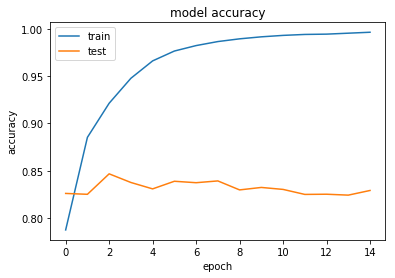

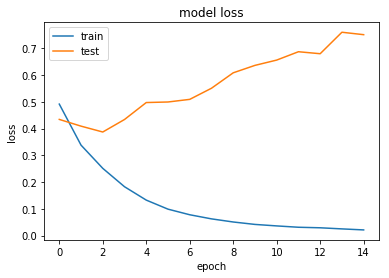

In [0]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)



print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(50, input_shape = (300,1), return_sequences = True))
model.add(GRU(1, return_sequences = False))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15, 
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
from nltk import word_tokenize
from keras.preprocessing import sequence
word2index = imdb.get_word_index()
test=[]
for word in word_tokenize( "the worst movie this year"):
     test.append(word2index[word])
print(test)
test=sequence.pad_sequences([test],maxlen=100)
model.predict(test)

[1, 246, 17, 11, 288]


array([[0.83435977]], dtype=float32)